In [1]:
import python_utils as utils
import sys
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os
import neurodsp
import re
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
#messo n_parseg = 150 e sembra avere senso lo spettrogramma anche se non sono 100 come nell'articolo
parseg = 100

# Trovare $\alpha$

In [3]:
Dd = "0.95"
function = "flat"
subnets = "STN"
sigm_par = float('inf')

new_Dd = Dd.replace('.','_')
new_function = re.sub(r"[^0-9]", "", function) #lascia solo numero funzione

In [4]:
#check if periodogram folder exists and if not create one
periodogram_path = './periodograms/' + new_Dd + '_' + subnets + '_' + function
if not os.path.exists(periodogram_path):
    os.makedirs(periodogram_path)    

In [5]:
#funzione Dd
data1 = np.loadtxt("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6/ext_rateD2.txt").T
#spikesim
s1 = utils.SpikeSim("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6", 'new_sim_parallel.yaml', 1000, np.max(data1[0]))

In [6]:
alpha1, alpha3 = s1.threshold(pop=subnets, N_parseg=parseg, save_img = periodogram_path + "/periodogram.png")

nparseg = 100	noverlap=20


In [7]:
Dd = "0.85"
function = "flat"
subnets = "STN"
sigm_par = float('inf')

new_Dd = Dd.replace('.','_')
new_function = re.sub(r"[^0-9]", "", function) #lascia solo numero funzione

In [8]:
#check if periodogram folder exists and if not create one
periodogram_path = './periodograms/' + new_Dd + '_' + subnets + '_' + function
if not os.path.exists(periodogram_path):
    os.makedirs(periodogram_path)    

In [9]:
#funzione Dd
data2 = np.loadtxt("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6/ext_rateD2.txt").T
#spikesim
s2 = utils.SpikeSim("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6", 'new_sim_parallel.yaml', 1000, np.max(data2[0]))

In [10]:
alpha2, alpha4 = s2.threshold(pop=subnets, N_parseg=parseg, save_img = periodogram_path + "/periodogram.png")

nparseg = 100	noverlap=20


In [11]:
#s.info()

#s2.histogram('all', res = 10., dd_par= sigm_par, save_img = periodogram_path + "/activity" + new_function + ".png")

In [12]:
#dopamine depletion periodogram
#s2.periodogramdd(pop=subnets, data=data1, dd_par=sigm_par, res=1., N_parseg=parseg, save_img = periodogram_path + "/"+ subnets + new_function + "_periodogram.png")

In [13]:
#s2.threshold_imgs(pop=subnets, N_parseg=parseg), save_img = *)

In [14]:
print(alpha1)
print(alpha2)
print(alpha3)
print(alpha4)

0.48066557998242504
0.034236691344490124
0.32589056273950817
0.024655339554049065


In [15]:
alpha = (alpha1 + alpha2)/2
print(alpha)

0.25745113566345756


In [16]:
alpha_mean = (alpha3 + alpha4)/2
print(alpha_mean)

0.17527295114677863


# FLAT 0.85

nparseg = 100	noverlap=20
frequenza del massimo: 19.0
valore del massimo: 18.510634943443065


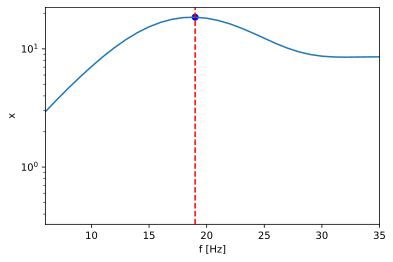

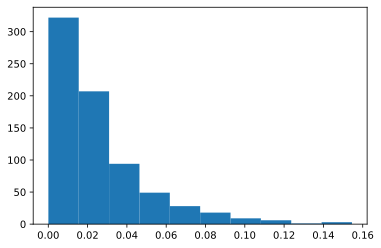

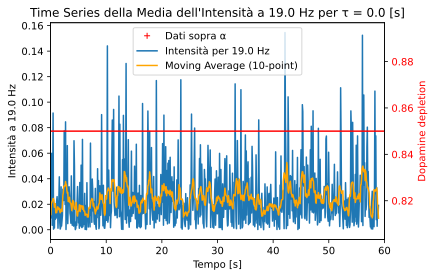

In [17]:
data = data2
output=s2.periodogram(pop=subnets, res=1., N_parseg=parseg, save_img=periodogram_path + "/periodogram.png")
f = output[0]
t = output[1]
Sxx = output[2]
data[0] = data[0]/1000
data[1] = data[1]/1.083


# faccio somma nel tempo per trovare frequenza max #######################################################
sum1 = np.sum(Sxx, axis=1) #somma per tutte frequenze

# Ottieni l'indice del massimo della funzione
max_index = np.argmax(sum1)
max_value = sum1[max_index]
print('frequenza del massimo:', f[max_index])
print('valore del massimo:', max_value)


plt.figure()
plt.plot(f, sum1)
plt.xlabel('f [Hz]')
plt.xlim(6, 35)
plt.ylabel('x')
plt.yscale('log')

# Traccia una riga verticale sul massimo
plt.axvline(x=f[max_index], color='red', linestyle='--')
# Aggiungi un punto sul massimo
plt.scatter(f[max_index], max_value, color='blue', marker='o')
plt.show()

# 2Estrarre la colonna corrispondente all'indice max_index
Sxx_max_index = Sxx[max_index, :]

plt.hist(Sxx_max_index)
plt.show()

# Creare un grafico dei valori nel tempo
fig, ax1 = plt.subplots()

ax1.plot(t[Sxx_max_index >= alpha], Sxx_max_index[Sxx_max_index >= alpha], '+r', label='Dati sopra \u03B1')
ax1.plot(t, Sxx_max_index, label=f'Intensità per {f[max_index]:.1f} Hz')

# Aggiungi la moving average al grafico di ax1
window_size = 10  # Sostituisci con la dimensione della finestra desiderata
moving_avg = np.convolve(Sxx_max_index, np.ones(window_size)/window_size, mode='same')
ax1.plot(t, moving_avg, label=f'Moving Average ({window_size}-point)', color='orange')

plt.xlabel('Tempo [s]')
plt.ylabel(f'Intensità a {f[max_index]:.1f} Hz')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(data[0], data[1], 'r-')
ax2.set_xlim(0, data[0][-1])
ax2.set_ylabel('Dopamine depletion', color='r')
ax2.tick_params(axis='y', labelcolor='red')


plt.title(f'Time Series della Media dell\'Intensità a {f[max_index]:.1f} Hz per \u03C4 = {1/sigm_par/1000} [s]')
plt.show()

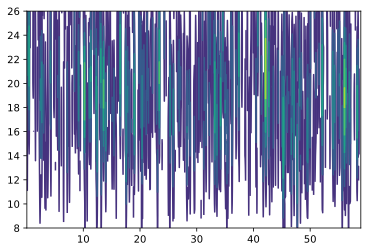

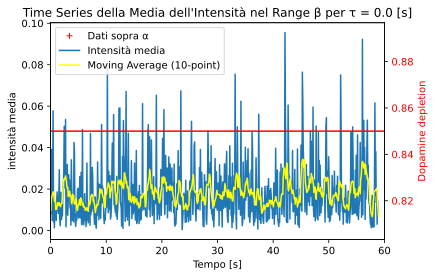

In [18]:
mask = (8 <= f) & (f <= 26)
Sxx_lim = Sxx[mask,:]
f_lim = f[mask]
plt.contour(t,f_lim,Sxx_lim)
plt.show()


pow_t = []
for i in range(len(t)):
    pow_t.append( np.mean(Sxx_lim[:, i]) )

# Creare un grafico dei valori nel tempo
# Finestra mobile (rolling window) per il calcolo della moving average
window_size = 10  # Sostituisci con la dimensione della finestra desiderata
moving_avg = np.convolve(pow_t, np.ones(window_size)/window_size, mode='same')

# Creare un grafico dei valori nel tempo
fig, ax1 = plt.subplots()

pow_t = np.array(pow_t)

# Plot dei dati originali
ax1.plot(t[pow_t >= alpha_mean], pow_t[pow_t >= alpha_mean], '+r', label='Dati sopra \u03B1')
ax1.plot(t, pow_t, label='Intensità media')

# Aggiungi la moving average al grafico di ax1
ax1.plot(t, moving_avg, label=f'Moving Average ({window_size}-point)', color='yellow')

plt.xlabel('Tempo [s]')
plt.ylabel('intensità media')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(data[0], data[1], 'r-')
ax2.set_xlim(0, data[0][-1])
ax2.set_ylabel('Dopamine depletion', color='r')
ax2.tick_params(axis='y', labelcolor='red')

plt.title(f'Time Series della Media dell\'Intensità nel Range \u03B2 per \u03C4 = {1/sigm_par/1000} [s]')
plt.show()

In [19]:
utils.burst_sequence((Sxx_max_index>=alpha)*1)

numero di burst, lunghezza di ogni burst, lunghezza media: 

(0, [], 0)

In [20]:
utils.burst_sequence((pow_t>=alpha_mean)*1)

numero di burst, lunghezza di ogni burst, lunghezza media: 

(0, [], 0)

# FLAT 0.95

nparseg = 100	noverlap=20
frequenza del massimo: 17.0
valore del massimo: 278.8518492232019


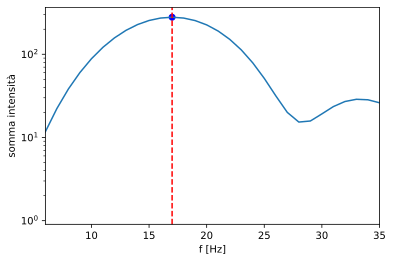

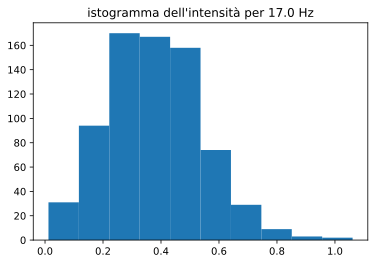

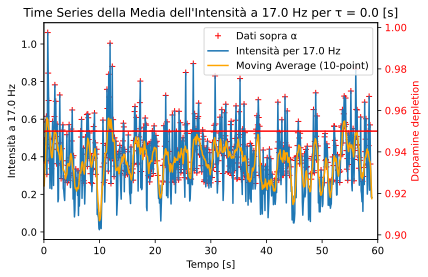

In [21]:
data = data1
output=s1.periodogram(pop=subnets, res=1., N_parseg=parseg, save_img=periodogram_path + "/periodogram.png")
f = output[0]
t = output[1]
Sxx = output[2]
data[0] = data[0]/1000
data[1] = data[1]/1.083


# faccio somma nel tempo per trovare frequenza max #######################################################
sum1 = np.sum(Sxx, axis=1) #somma per tutte frequenze

# Ottieni l'indice del massimo della funzione
max_index = np.argmax(sum1)
max_value = sum1[max_index]
print('frequenza del massimo:', f[max_index])
print('valore del massimo:', max_value)

plt.figure()
plt.plot(f, sum1)
plt.xlabel('f [Hz]')
plt.xlim(6, 35)
plt.ylabel('somma intensità')
plt.yscale('log')

# Traccia una riga verticale sul massimo
plt.axvline(x=f[max_index], color='red', linestyle='--')
# Aggiungi un punto sul massimo
plt.scatter(f[max_index], max_value, color='blue', marker='o')
plt.show()

# 2Estrarre la colonna corrispondente all'indice max_index #########################################################
Sxx_max_index = Sxx[max_index, :]

plt.hist(Sxx_max_index)
plt.title(f'istogramma dell\'intensità per {f[max_index]:.1f} Hz')
plt.show()

# Creare un grafico dei valori nel tempo #####################################################################
fig, ax1 = plt.subplots()

ax1.plot(t[Sxx_max_index >= alpha], Sxx_max_index[Sxx_max_index >= alpha], '+r', label='Dati sopra \u03B1')
ax1.plot(t, Sxx_max_index, label=f'Intensità per {f[max_index]:.1f} Hz')

# Aggiungi la moving average al grafico di ax1
window_size = 10  # Sostituisci con la dimensione della finestra desiderata
moving_avg = np.convolve(Sxx_max_index, np.ones(window_size)/window_size, mode='same')
ax1.plot(t, moving_avg, label=f'Moving Average ({window_size}-point)', color='orange')

plt.xlabel('Tempo [s]')
plt.ylabel(f'Intensità a {f[max_index]:.1f} Hz')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(data[0], data[1], 'r-')
ax2.set_xlim(0, data[0][-1])
ax2.set_ylabel('Dopamine depletion', color='r')
ax2.tick_params(axis='y', labelcolor='red')


plt.title(f'Time Series della Media dell\'Intensità a {f[max_index]:.1f} Hz per \u03C4 = {1/sigm_par/1000} [s]')
plt.show()

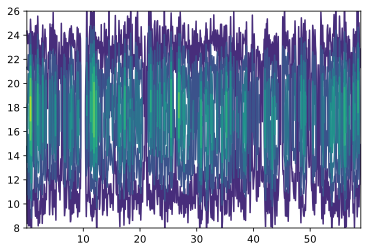

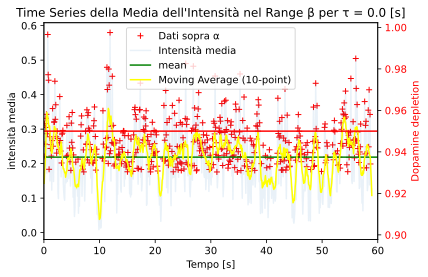

In [22]:
mask = (8 <= f) & (f <= 26)
Sxx_lim = Sxx[mask,:]
f_lim = f[mask]
plt.contour(t,f_lim,Sxx_lim)
plt.show()


pow_t = []
for i in range(len(t)):
    pow_t.append( np.mean(Sxx_lim[:, i]) )

# Creare un grafico dei valori nel tempo
# Finestra mobile (rolling window) per il calcolo della moving average
window_size = 10  # Sostituisci con la dimensione della finestra desiderata
moving_avg = np.convolve(pow_t, np.ones(window_size)/window_size, mode='same')

# Creare un grafico dei valori nel tempo
fig, ax1 = plt.subplots()

pow_t = np.array(pow_t)

# Plot dei dati originali
ax1.plot(t[pow_t >= alpha_mean], pow_t[pow_t >= alpha_mean], '+r', label='Dati sopra \u03B1')
ax1.plot(t, pow_t,alpha=0.1, label='Intensità media')
ax1.axhline(y=np.mean(pow_t),label='mean',color='green')

# Aggiungi la moving average al grafico di ax1
ax1.plot(t, moving_avg, label=f'Moving Average ({window_size}-point)', color='yellow')

plt.xlabel('Tempo [s]')
plt.ylabel('intensità media')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(data[0], data[1], 'r-')
ax2.set_xlim(0, data[0][-1])
ax2.set_ylabel('Dopamine depletion', color='r')
ax2.tick_params(axis='y', labelcolor='red')

plt.title(f'Time Series della Media dell\'Intensità nel Range \u03B2 per \u03C4 = {1/sigm_par/1000} [s]')
plt.show()

In [23]:
utils.burst_sequence((Sxx_max_index>=alpha)*1)

numero di burst, lunghezza di ogni burst, lunghezza media: 

(7, [119, 125, 289, 13, 5, 17, 108], 96.57142857142857)

In [24]:
utils.burst_sequence((pow_t>=alpha_mean)*1)

numero di burst, lunghezza di ogni burst, lunghezza media: 

(13, [43, 17, 26, 118, 54, 176, 17, 13, 5, 14, 8, 62, 17], 43.84615384615385)

# FLAT1

In [25]:
#valore threshold trovato sopra trascritto in modo da evitare calcoli
#alpha = 0.2573329144325134
#alpha_mean = 0.16799556857190273

In [26]:
Dd = "0.95"
function = "flat1"
subnets = "STN"
sigm_par = float('inf')

new_Dd = Dd.replace('.','_')
new_function = re.sub(r"[^0-9]", "", function) #lascia solo numero funzione

In [27]:
#check if periodogram folder exists and if not create one
periodogram_path = './periodograms/' + new_Dd + '_' + subnets + '_' + function
if not os.path.exists(periodogram_path):
    os.makedirs(periodogram_path)    

#funzione Dd
data = np.loadtxt("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6/ext_rateD2.txt").T
#spikesim
s = utils.SpikeSim("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6", 'new_sim_parallel.yaml', 1000, np.max(data[0]))

In [28]:
#dopamine depletion periodogram
#s.periodogramdd(pop=subnets, data=data, dd_par=sigm_par, res=1., N_parseg=parseg, save_img = periodogram_path + "/"+ subnets + new_function + "_periodogram.png")

nparseg = 100	noverlap=20
frequenza del massimo: 17.0
valore del massimo: 370.9348849156037


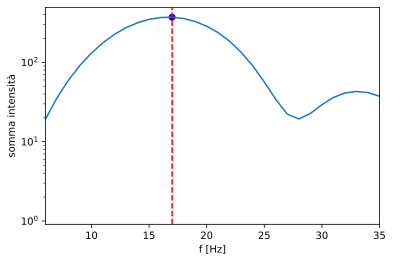

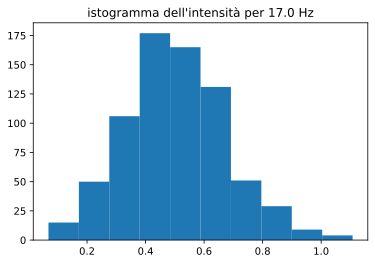

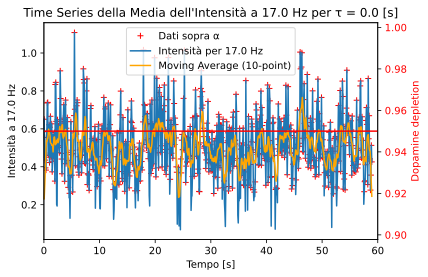

In [29]:
output=s.periodogram(pop=subnets, res=1., N_parseg=parseg, save_img=periodogram_path + "/periodogram.png")
f = output[0]
t = output[1]
Sxx = output[2]
data[0] = data[0]/1000
data[1] = data[1]/1.083

# faccio somma nel tempo per trovare frequenza max #######################################################
sum1 = np.sum(Sxx, axis=1) #somma per tutte frequenze

# Ottieni l'indice del massimo della funzione
max_index = np.argmax(sum1)
max_value = sum1[max_index]
print('frequenza del massimo:', f[max_index])
print('valore del massimo:', max_value)

plt.figure()
plt.plot(f, sum1)
plt.xlabel('f [Hz]')
plt.xlim(6, 35)
plt.ylabel('somma intensità')
plt.yscale('log')

# Traccia una riga verticale sul massimo
plt.axvline(x=f[max_index], color='red', linestyle='--')
# Aggiungi un punto sul massimo
plt.scatter(f[max_index], max_value, color='blue', marker='o')
plt.show()

# 2Estrarre la colonna corrispondente all'indice max_index #########################################################
Sxx_max_index = Sxx[max_index, :]

plt.hist(Sxx_max_index)
plt.title(f'istogramma dell\'intensità per {f[max_index]:.1f} Hz')
plt.show()

# Creare un grafico dei valori nel tempo #####################################################################
fig, ax1 = plt.subplots()

ax1.plot(t[Sxx_max_index >= alpha], Sxx_max_index[Sxx_max_index >= alpha], '+r', label='Dati sopra \u03B1')
ax1.plot(t, Sxx_max_index, label=f'Intensità per {f[max_index]:.1f} Hz')

# Aggiungi la moving average al grafico di ax1
window_size = 10  # Sostituisci con la dimensione della finestra desiderata
moving_avg = np.convolve(Sxx_max_index, np.ones(window_size)/window_size, mode='same')
ax1.plot(t, moving_avg, label=f'Moving Average ({window_size}-point)', color='orange')

plt.xlabel('Tempo [s]')
plt.ylabel(f'Intensità a {f[max_index]:.1f} Hz')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(data[0], data[1], 'r-')
ax2.set_xlim(0, data[0][-1])
ax2.set_ylabel('Dopamine depletion', color='r')
ax2.tick_params(axis='y', labelcolor='red')


plt.title(f'Time Series della Media dell\'Intensità a {f[max_index]:.1f} Hz per \u03C4 = {1/sigm_par/1000} [s]')
plt.show()

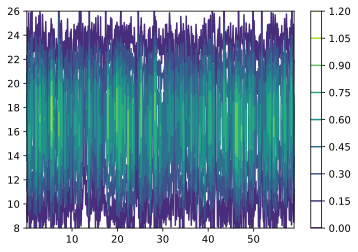

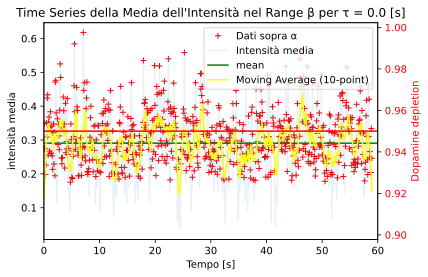

In [30]:
mask = (8 <= f) & (f <= 26)
Sxx_lim = Sxx[mask,:]
f_lim = f[mask]
plt.contour(t,f_lim,Sxx_lim)
plt.colorbar()
plt.show()


pow_t = []
for i in range(len(t)):
    pow_t.append( np.mean(Sxx_lim[:, i]) )

# Creare un grafico dei valori nel tempo
# Finestra mobile (rolling window) per il calcolo della moving average
window_size = 10  # Sostituisci con la dimensione della finestra desiderata
moving_avg = np.convolve(pow_t, np.ones(window_size)/window_size, mode='same')

# Creare un grafico dei valori nel tempo
fig, ax1 = plt.subplots()

pow_t = np.array(pow_t)

# Plot dei dati originali
ax1.plot(t[pow_t >= alpha_mean], pow_t[pow_t >= alpha_mean], '+r', label='Dati sopra \u03B1')
ax1.plot(t, pow_t,alpha=0.1, label='Intensità media')
ax1.axhline(y=np.mean(pow_t),label='mean',color='green')

# Aggiungi la moving average al grafico di ax1
ax1.plot(t, moving_avg, label=f'Moving Average ({window_size}-point)', color='yellow')

plt.xlabel('Tempo [s]')
plt.ylabel('intensità media')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(data[0], data[1], 'r-')
ax2.set_xlim(0, data[0][-1])
ax2.set_ylabel('Dopamine depletion', color='r')
ax2.tick_params(axis='y', labelcolor='red')

plt.title(f'Time Series della Media dell\'Intensità nel Range \u03B2 per \u03C4 = {1/sigm_par/1000} [s]')
plt.show()

In [31]:
utils.burst_sequence((Sxx_max_index>=alpha)*1)

numero di burst, lunghezza di ogni burst, lunghezza media: 

(1, [737], 737.0)

In [32]:
utils.burst_sequence((pow_t>=alpha_mean)*1)

numero di burst, lunghezza di ogni burst, lunghezza media: 

(2, [519, 212], 365.5)

# FLAT2

In [33]:
#valore threshold trovato sopra trascritto in modo da evitare calcoli
#alpha = 0.2573329144325134
#alpha_mean = 0.16799556857190273

In [34]:
Dd = "0.95"
function = "flat2"
subnets = "STN"
sigm_par = float('inf')

new_Dd = Dd.replace('.','_')
new_function = re.sub(r"[^0-9]", "", function) #lascia solo numero funzione

In [35]:
#check if periodogram folder exists and if not create one
periodogram_path = './periodograms/' + new_Dd + '_' + subnets + '_' + function
if not os.path.exists(periodogram_path):
    os.makedirs(periodogram_path)    

#funzione Dd
data = np.loadtxt("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6/ext_rateD2.txt").T
#spikesim
s = utils.SpikeSim("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6", 'new_sim_parallel.yaml', 1000, np.max(data[0]))

In [36]:
#dopamine depletion periodogram
#s.periodogramdd(pop=subnets, data=data, dd_par=sigm_par, res=1., N_parseg=parseg, save_img = periodogram_path + "/"+ subnets + new_function + "_periodogram.png")

nparseg = 100	noverlap=20
frequenza del massimo: 17.0
valore del massimo: 267.735455610177


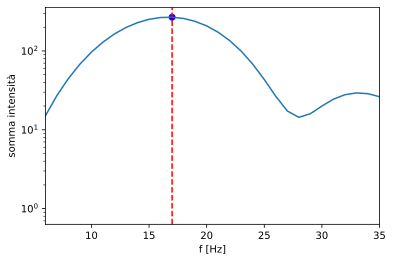

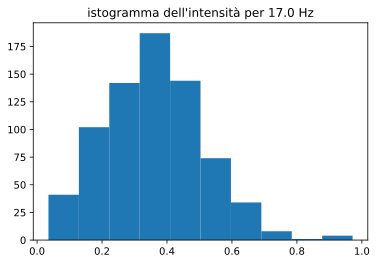

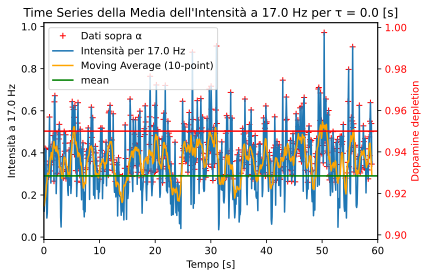

In [37]:
output=s.periodogram(pop=subnets, res=1., N_parseg=parseg, save_img=periodogram_path + "/periodogram.png")
f = output[0]
t = output[1]
Sxx = output[2]
data[0] = data[0]/1000
data[1] = data[1]/1.083


# faccio somma nel tempo per trovare frequenza max #######################################################
sum1 = np.sum(Sxx, axis=1) #somma per tutte frequenze

# Ottieni l'indice del massimo della funzione
max_index = np.argmax(sum1)
max_value = sum1[max_index]
print('frequenza del massimo:', f[max_index])
print('valore del massimo:', max_value)

plt.figure()
plt.plot(f, sum1)
plt.xlabel('f [Hz]')
plt.xlim(6, 35)
plt.ylabel('somma intensità')
plt.yscale('log')

# Traccia una riga verticale sul massimo
plt.axvline(x=f[max_index], color='red', linestyle='--')
# Aggiungi un punto sul massimo
plt.scatter(f[max_index], max_value, color='blue', marker='o')
plt.show()

# 2Estrarre la colonna corrispondente all'indice max_index #########################################################
Sxx_max_index = Sxx[max_index, :]

plt.hist(Sxx_max_index)
plt.title(f'istogramma dell\'intensità per {f[max_index]:.1f} Hz')
plt.show()

# Creare un grafico dei valori nel tempo #####################################################################
fig, ax1 = plt.subplots()

ax1.plot(t[Sxx_max_index >= alpha], Sxx_max_index[Sxx_max_index >= alpha], '+r', label='Dati sopra \u03B1')
ax1.plot(t, Sxx_max_index, label=f'Intensità per {f[max_index]:.1f} Hz')

# Aggiungi la moving average al grafico di ax1
window_size = 10  # Sostituisci con la dimensione della finestra desiderata
moving_avg = np.convolve(Sxx_max_index, np.ones(window_size)/window_size, mode='same')
ax1.plot(t, moving_avg, label=f'Moving Average ({window_size}-point)', color='orange')
ax1.axhline(y=np.mean(pow_t),label='mean',color='green')

plt.xlabel('Tempo [s]')
plt.ylabel(f'Intensità a {f[max_index]:.1f} Hz')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(data[0], data[1], 'r-')
ax2.set_xlim(0, data[0][-1])
ax2.set_ylabel('Dopamine depletion', color='r')
ax2.tick_params(axis='y', labelcolor='red')


plt.title(f'Time Series della Media dell\'Intensità a {f[max_index]:.1f} Hz per \u03C4 = {1/sigm_par/1000} [s]')
plt.show()

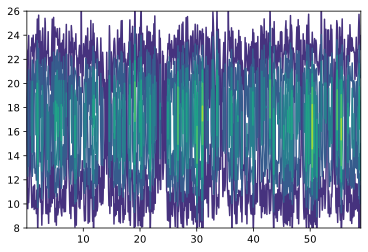

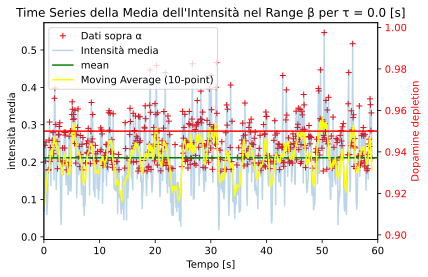

In [38]:
mask = (8 <= f) & (f <= 26)
Sxx_lim = Sxx[mask,:]
f_lim = f[mask]
plt.contour(t,f_lim,Sxx_lim)
plt.show()


pow_t = []
for i in range(len(t)):
    pow_t.append( np.mean(Sxx_lim[:, i]) )

# Creare un grafico dei valori nel tempo
# Finestra mobile (rolling window) per il calcolo della moving average
window_size = 10  # Sostituisci con la dimensione della finestra desiderata
moving_avg = np.convolve(pow_t, np.ones(window_size)/window_size, mode='same')

# Creare un grafico dei valori nel tempo
fig, ax1 = plt.subplots()

pow_t = np.array(pow_t)

# Plot dei dati originali
ax1.plot(t[pow_t >= alpha_mean], pow_t[pow_t >= alpha_mean], '+r', label='Dati sopra \u03B1')
ax1.plot(t, pow_t,alpha=0.3, label='Intensità media')
ax1.axhline(y=np.mean(pow_t),label='mean',color='green')

# Aggiungi la moving average al grafico di ax1
ax1.plot(t, moving_avg, label=f'Moving Average ({window_size}-point)', color='yellow')

plt.xlabel('Tempo [s]')
plt.ylabel('intensità media')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(data[0], data[1], 'r-')
ax2.set_xlim(0, data[0][-1])
ax2.set_ylabel('Dopamine depletion', color='r')
ax2.tick_params(axis='y', labelcolor='red')

plt.title(f'Time Series della Media dell\'Intensità nel Range \u03B2 per \u03C4 = {1/sigm_par/1000} [s]')
plt.show()

In [39]:
utils.burst_sequence((Sxx_max_index>=alpha)*1)

numero di burst, lunghezza di ogni burst, lunghezza media: 

(8, [79, 76, 105, 118, 34, 123, 51, 72], 82.25)

In [40]:
utils.burst_sequence((pow_t>=alpha_mean)*1)

numero di burst, lunghezza di ogni burst, lunghezza media: 

(14,
 [79, 28, 31, 17, 72, 81, 17, 32, 29, 74, 10, 31, 8, 55],
 40.285714285714285)

# SIGMOID10

In [41]:
#valore threshold trovato sopra trascritto in modo da evitare calcoli
#alpha = 0.2573329144325134
#alpha_mean = 0.16799556857190273

In [42]:
Dd = "0.95"
function = "sigmoid10"
subnets = "STN"
sigm_par = 0.00006

new_Dd = Dd.replace('.','_')
new_function = re.sub(r"[^0-9]", "", function) #lascia solo numero funzione

In [43]:
#check if periodogram folder exists and if not create one
periodogram_path = './periodograms/' + new_Dd + '_' + subnets + '_' + function
if not os.path.exists(periodogram_path):
    os.makedirs(periodogram_path)    

#funzione Dd
data = np.loadtxt("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6/ext_rateD2.txt").T
#spikesim
s = utils.SpikeSim("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6", 'new_sim_parallel.yaml', 1000, np.max(data[0]))

In [44]:
#dopamine depletion periodogram
#s3.periodogramdd(pop=subnets, data=data3, dd_par=sigm_par, res=1., N_parseg=parseg, save_img = periodogram_path + "/"+ subnets + new_function + "_periodogram.png")

nparseg = 100	noverlap=20
frequenza del massimo: 17.0
valore del massimo: 565.9033035957444


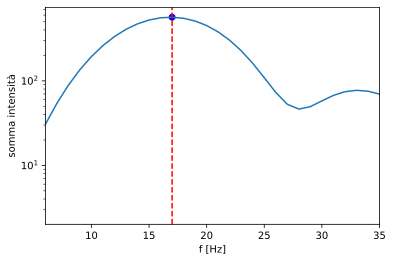

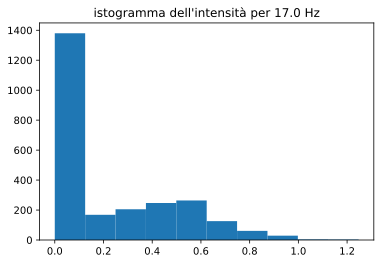

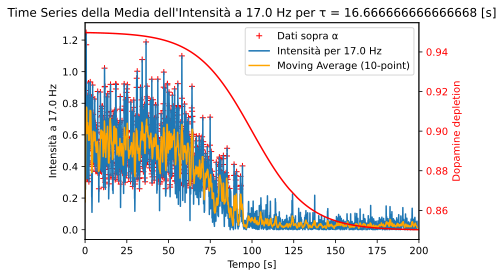

In [45]:
output=s.periodogram(pop=subnets, res=1., N_parseg=parseg, save_img=periodogram_path + "/periodogram.png")
f = output[0]
t = output[1]
Sxx = output[2]
data[0] = data[0]/1000
data[1] = data[1]/1.083


# faccio somma nel tempo per trovare frequenza max #######################################################
sum1 = np.sum(Sxx, axis=1) #somma per tutte frequenze

# Ottieni l'indice del massimo della funzione
max_index = np.argmax(sum1)
max_value = sum1[max_index]
print('frequenza del massimo:', f[max_index])
print('valore del massimo:', max_value)

plt.figure()
plt.plot(f, sum1)
plt.xlabel('f [Hz]')
plt.xlim(6, 35)
plt.ylabel('somma intensità')
plt.yscale('log')

# Traccia una riga verticale sul massimo
plt.axvline(x=f[max_index], color='red', linestyle='--')
# Aggiungi un punto sul massimo
plt.scatter(f[max_index], max_value, color='blue', marker='o')
plt.show()

# 2Estrarre la colonna corrispondente all'indice max_index #########################################################
Sxx_max_index = Sxx[max_index, :]

plt.hist(Sxx_max_index)
plt.title(f'istogramma dell\'intensità per {f[max_index]:.1f} Hz')
plt.show()

# Creare un grafico dei valori nel tempo #####################################################################
fig, ax1 = plt.subplots()

ax1.plot(t[Sxx_max_index >= alpha], Sxx_max_index[Sxx_max_index >= alpha], '+r', label='Dati sopra \u03B1')
ax1.plot(t, Sxx_max_index, label=f'Intensità per {f[max_index]:.1f} Hz')

# Aggiungi la moving average al grafico di ax1
window_size = 10  # Sostituisci con la dimensione della finestra desiderata
moving_avg = np.convolve(Sxx_max_index, np.ones(window_size)/window_size, mode='same')
ax1.plot(t, moving_avg, label=f'Moving Average ({window_size}-point)', color='orange')

plt.xlabel('Tempo [s]')
plt.ylabel(f'Intensità a {f[max_index]:.1f} Hz')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(data[0], data[1], 'r-')
ax2.set_xlim(0, data[0][-1])
ax2.set_ylabel('Dopamine depletion', color='r')
ax2.tick_params(axis='y', labelcolor='red')


plt.title(f'Time Series della Media dell\'Intensità a {f[max_index]:.1f} Hz per \u03C4 = {1/sigm_par/1000} [s]')
plt.show()

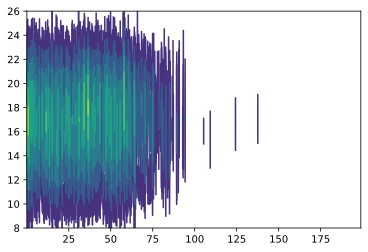

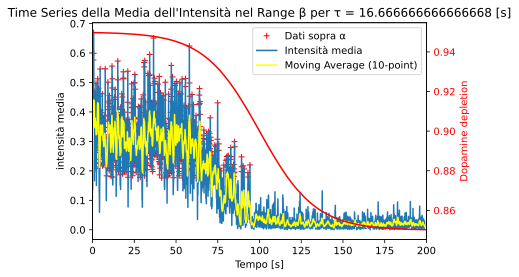

In [46]:
mask = (8 <= f) & (f <= 26)
Sxx_lim = Sxx[mask,:]
f_lim = f[mask]
plt.contour(t,f_lim,Sxx_lim)
plt.show()


pow_t = []
for i in range(len(t)):
    pow_t.append( np.mean(Sxx_lim[:, i]) )

# Creare un grafico dei valori nel tempo
# Finestra mobile (rolling window) per il calcolo della moving average
window_size = 10  # Sostituisci con la dimensione della finestra desiderata
moving_avg = np.convolve(pow_t, np.ones(window_size)/window_size, mode='same')

# Creare un grafico dei valori nel tempo
fig, ax1 = plt.subplots()

pow_t = np.array(pow_t)

# Plot dei dati originali
ax1.plot(t[pow_t >= alpha_mean], pow_t[pow_t >= alpha_mean], '+r', label='Dati sopra \u03B1')
ax1.plot(t, pow_t, label='Intensità media')

# Aggiungi la moving average al grafico di ax1
ax1.plot(t, moving_avg, label=f'Moving Average ({window_size}-point)', color='yellow')

plt.xlabel('Tempo [s]')
plt.ylabel('intensità media')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(data[0], data[1], 'r-')
ax2.set_xlim(0, data[0][-1])
ax2.set_ylabel('Dopamine depletion', color='r')
ax2.tick_params(axis='y', labelcolor='red')

plt.title(f'Time Series della Media dell\'Intensità nel Range \u03B2 per \u03C4 = {1/sigm_par/1000} [s]')
plt.show()

In [47]:
utils.burst_sequence((Sxx_max_index>=alpha)*1)

numero di burst, lunghezza di ogni burst, lunghezza media: 

(6, [46, 832, 68, 14, 5, 10], 162.5)

In [48]:
utils.burst_sequence((pow_t>=alpha_mean)*1)

numero di burst, lunghezza di ogni burst, lunghezza media: 

(8, [46, 316, 333, 70, 95, 42, 11, 5], 114.75)

# SIGMOID11

In [49]:
#valore threshold trovato sopra trascritto in modo da evitare calcoli
#alpha = 0.2573329144325134
#alpha_mean = 0.16799556857190273

In [50]:
Dd = "0.95"
function = "sigmoid11"
subnets = "STN"
sigm_par = 0.00004

new_Dd = Dd.replace('.','_')
new_function = re.sub(r"[^0-9]", "", function) #lascia solo numero funzione

In [51]:
#check if periodogram folder exists and if not create one
periodogram_path = './periodograms/' + new_Dd + '_' + subnets + '_' + function
if not os.path.exists(periodogram_path):
    os.makedirs(periodogram_path)    

#funzione Dd
data = np.loadtxt("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6/ext_rateD2.txt").T
#spikesim
s = utils.SpikeSim("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6", 'new_sim_parallel.yaml', 1000, np.max(data[0]))

In [52]:
#dopamine depletion periodogram
#s5.periodogramdd(pop=subnets, data=data3, dd_par=sigm_par, res=1., N_parseg=parseg, save_img = periodogram_path + "/"+ subnets + new_function + "_periodogram.png")

nparseg = 100	noverlap=20
frequenza del massimo: 17.0
valore del massimo: 470.9131327651566


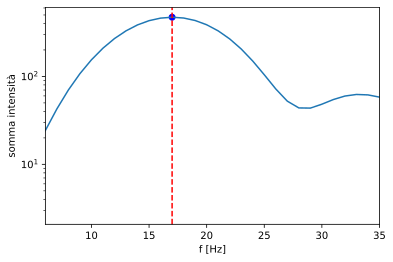

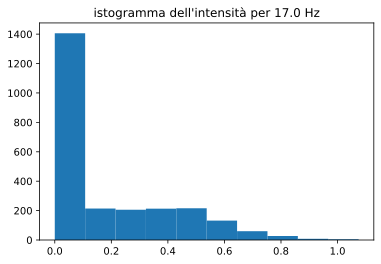

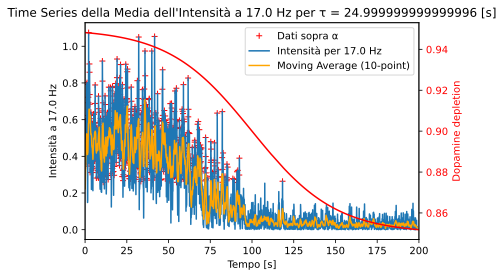

In [53]:
output=s.periodogram(pop=subnets, res=1., N_parseg=parseg, save_img=periodogram_path + "/periodogram.png")
f = output[0]
t = output[1]
Sxx = output[2]
data[0] = data[0]/1000
data[1] = data[1]/1.083


# faccio somma nel tempo per trovare frequenza max #######################################################
sum1 = np.sum(Sxx, axis=1) #somma per tutte frequenze

# Ottieni l'indice del massimo della funzione
max_index = np.argmax(sum1)
max_value = sum1[max_index]
print('frequenza del massimo:', f[max_index])
print('valore del massimo:', max_value)

plt.figure()
plt.plot(f, sum1)
plt.xlabel('f [Hz]')
plt.xlim(6, 35)
plt.ylabel('somma intensità')
plt.yscale('log')

# Traccia una riga verticale sul massimo
plt.axvline(x=f[max_index], color='red', linestyle='--')
# Aggiungi un punto sul massimo
plt.scatter(f[max_index], max_value, color='blue', marker='o')
plt.show()

# 2Estrarre la colonna corrispondente all'indice max_index #########################################################
Sxx_max_index = Sxx[max_index, :]

plt.hist(Sxx_max_index)
plt.title(f'istogramma dell\'intensità per {f[max_index]:.1f} Hz')
plt.show()

# Creare un grafico dei valori nel tempo #####################################################################
fig, ax1 = plt.subplots()

ax1.plot(t[Sxx_max_index >= alpha], Sxx_max_index[Sxx_max_index >= alpha], '+r', label='Dati sopra \u03B1')
ax1.plot(t, Sxx_max_index, label=f'Intensità per {f[max_index]:.1f} Hz')

# Aggiungi la moving average al grafico di ax1
window_size = 10  # Sostituisci con la dimensione della finestra desiderata
moving_avg = np.convolve(Sxx_max_index, np.ones(window_size)/window_size, mode='same')
ax1.plot(t, moving_avg, label=f'Moving Average ({window_size}-point)', color='orange')

plt.xlabel('Tempo [s]')
plt.ylabel(f'Intensità a {f[max_index]:.1f} Hz')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(data[0], data[1], 'r-')
ax2.set_xlim(0, data[0][-1])
ax2.set_ylabel('Dopamine depletion', color='r')
ax2.tick_params(axis='y', labelcolor='red')


plt.title(f'Time Series della Media dell\'Intensità a {f[max_index]:.1f} Hz per \u03C4 = {1/sigm_par/1000} [s]')
plt.show()

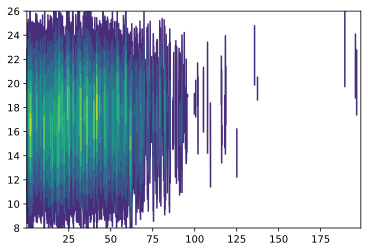

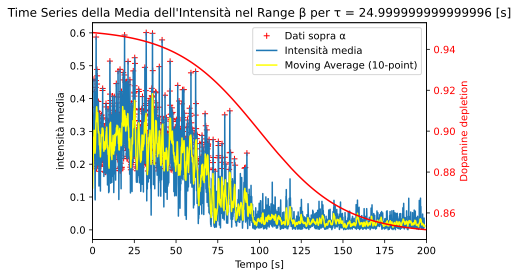

In [54]:
mask = (8 <= f) & (f <= 26)
Sxx_lim = Sxx[mask,:]
f_lim = f[mask]
plt.contour(t,f_lim,Sxx_lim)
plt.show()


pow_t = []
for i in range(len(t)):
    pow_t.append( np.mean(Sxx_lim[:, i]) )

# Creare un grafico dei valori nel tempo
# Finestra mobile (rolling window) per il calcolo della moving average
window_size = 10  # Sostituisci con la dimensione della finestra desiderata
moving_avg = np.convolve(pow_t, np.ones(window_size)/window_size, mode='same')

# Creare un grafico dei valori nel tempo
fig, ax1 = plt.subplots()

pow_t = np.array(pow_t)

# Plot dei dati originali
ax1.plot(t[pow_t >= alpha_mean], pow_t[pow_t >= alpha_mean], '+r', label='Dati sopra \u03B1')
ax1.plot(t, pow_t, label='Intensità media')

# Aggiungi la moving average al grafico di ax1
ax1.plot(t, moving_avg, label=f'Moving Average ({window_size}-point)', color='yellow')

plt.xlabel('Tempo [s]')
plt.ylabel('intensità media')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(data[0], data[1], 'r-')
ax2.set_xlim(0, data[0][-1])
ax2.set_ylabel('Dopamine depletion', color='r')
ax2.tick_params(axis='y', labelcolor='red')

plt.title(f'Time Series della Media dell\'Intensità nel Range \u03B2 per \u03C4 = {1/sigm_par/1000} [s]')
plt.show()

In [55]:
utils.burst_sequence((Sxx_max_index>=alpha)*1)

numero di burst, lunghezza di ogni burst, lunghezza media: 

(7, [640, 33, 92, 49, 5, 5, 6], 118.57142857142857)

In [56]:
utils.burst_sequence((pow_t>=alpha_mean)*1)

numero di burst, lunghezza di ogni burst, lunghezza media: 

(7, [435, 199, 29, 52, 26, 12, 29], 111.71428571428571)

# SIGMOID12

In [57]:
#valore threshold trovato sopra trascritto in modo da evitare calcoli
#alpha = 0.2573329144325134
#alpha_mean = 0.16799556857190273

In [58]:
Dd = "0.95"
function = "sigmoid1.0"
subnets = "STN"
sigm_par = 0.001

new_Dd = Dd.replace('.','_')
new_function = re.sub(r"[^0-9]", "", function) #lascia solo numero funzione

In [59]:
#check if periodogram folder exists and if not create one
periodogram_path = './periodograms/' + new_Dd + '_' + subnets + '_' + function
if not os.path.exists(periodogram_path):
    os.makedirs(periodogram_path)    

#funzione Dd
data = np.loadtxt("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6/ext_rateD2.txt").T
#spikesim
s = utils.SpikeSim("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6", 'new_sim_parallel.yaml', 1000, np.max(data[0]))

In [60]:
#dopamine depletion periodogram
#s5.periodogramdd(pop=subnets, data=data3, dd_par=sigm_par, res=1., N_parseg=parseg, save_img = periodogram_path + "/"+ subnets + new_function + "_periodogram.png")

nparseg = 100	noverlap=20
frequenza del massimo: 17.0
valore del massimo: 26.500763106633634


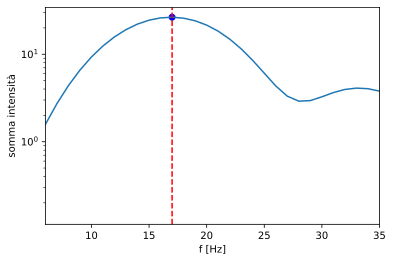

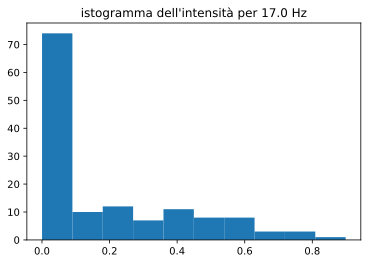

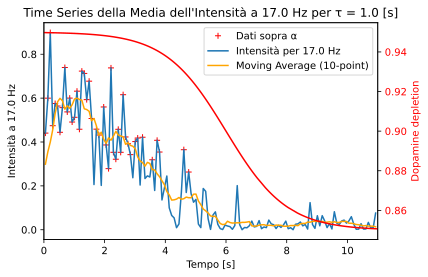

In [61]:
output=s.periodogram(pop=subnets, res=1., N_parseg=parseg, save_img=periodogram_path + "/periodogram.png")
f = output[0]
t = output[1]
Sxx = output[2]
data[0] = data[0]/1000
data[1] = data[1]/1.083


# faccio somma nel tempo per trovare frequenza max #######################################################
sum1 = np.sum(Sxx, axis=1) #somma per tutte frequenze

# Ottieni l'indice del massimo della funzione
max_index = np.argmax(sum1)
max_value = sum1[max_index]
print('frequenza del massimo:', f[max_index])
print('valore del massimo:', max_value)

plt.figure()
plt.plot(f, sum1)
plt.xlabel('f [Hz]')
plt.xlim(6, 35)
plt.ylabel('somma intensità')
plt.yscale('log')

# Traccia una riga verticale sul massimo
plt.axvline(x=f[max_index], color='red', linestyle='--')
# Aggiungi un punto sul massimo
plt.scatter(f[max_index], max_value, color='blue', marker='o')
plt.show()

# 2Estrarre la colonna corrispondente all'indice max_index #########################################################
Sxx_max_index = Sxx[max_index, :]

plt.hist(Sxx_max_index)
plt.title(f'istogramma dell\'intensità per {f[max_index]:.1f} Hz')
plt.show()

# Creare un grafico dei valori nel tempo #####################################################################
fig, ax1 = plt.subplots()

ax1.plot(t[Sxx_max_index >= alpha], Sxx_max_index[Sxx_max_index >= alpha], '+r', label='Dati sopra \u03B1')
ax1.plot(t, Sxx_max_index, label=f'Intensità per {f[max_index]:.1f} Hz')

# Aggiungi la moving average al grafico di ax1
window_size = 10  # Sostituisci con la dimensione della finestra desiderata
moving_avg = np.convolve(Sxx_max_index, np.ones(window_size)/window_size, mode='same')
ax1.plot(t, moving_avg, label=f'Moving Average ({window_size}-point)', color='orange')

plt.xlabel('Tempo [s]')
plt.ylabel(f'Intensità a {f[max_index]:.1f} Hz')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(data[0], data[1], 'r-')
ax2.set_xlim(0, data[0][-1] - 1)
ax2.set_ylabel('Dopamine depletion', color='r')
ax2.tick_params(axis='y', labelcolor='red')


plt.title(f'Time Series della Media dell\'Intensità a {f[max_index]:.1f} Hz per \u03C4 = {1/sigm_par/1000} [s]')
plt.show()

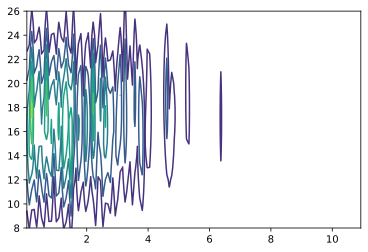

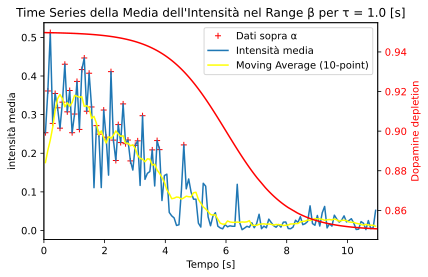

In [62]:
mask = (8 <= f) & (f <= 26)
Sxx_lim = Sxx[mask,:]
f_lim = f[mask]
plt.contour(t,f_lim,Sxx_lim)
plt.show()


pow_t = []
for i in range(len(t)):
    pow_t.append( np.mean(Sxx_lim[:, i]) )

# Creare un grafico dei valori nel tempo
# Finestra mobile (rolling window) per il calcolo della moving average
window_size = 10  # Sostituisci con la dimensione della finestra desiderata
moving_avg = np.convolve(pow_t, np.ones(window_size)/window_size, mode='same')

# Creare un grafico dei valori nel tempo
fig, ax1 = plt.subplots()

pow_t = np.array(pow_t)

# Plot dei dati originali
ax1.plot(t[pow_t >= alpha_mean], pow_t[pow_t >= alpha_mean], '+r', label='Dati sopra \u03B1')
ax1.plot(t, pow_t, label='Intensità media')

# Aggiungi la moving average al grafico di ax1
ax1.plot(t, moving_avg, label=f'Moving Average ({window_size}-point)', color='yellow')

plt.xlabel('Tempo [s]')
plt.ylabel('intensità media')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(data[0], data[1], 'r-')
ax2.set_xlim(0, data[0][-1] - 1)
ax2.set_ylabel('Dopamine depletion', color='r')
ax2.tick_params(axis='y', labelcolor='red')

plt.title(f'Time Series della Media dell\'Intensità nel Range \u03B2 per \u03C4 = {1/sigm_par/1000} [s]')
plt.show()

In [63]:
utils.burst_sequence((Sxx_max_index>=alpha)*1)

numero di burst, lunghezza di ogni burst, lunghezza media: 

(1, [48], 48.0)

In [64]:
utils.burst_sequence((pow_t>=alpha_mean)*1)

numero di burst, lunghezza di ogni burst, lunghezza media: 

(1, [48], 48.0)